# Elección de monedas

Como quedó aclarado en el primer notebook, vamos a explorar y seleccionar 5 Payment Cryptos y 5 Privacy Cryptos.

In [25]:
import pandas as pd
import datetime as dt
import time as t
from pycoingecko import CoinGeckoAPI
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.graph_objects as go
#from plotly.offline import plot


# 'payment-solutions', 'name': 'Payment Solutions'
# 'privacy-coins', 'name': 'Privacy Coins

Conectamos con la API de CoinGecko y confirmamos conexión.

In [2]:
cg = CoinGeckoAPI()

cg.ping()

{'gecko_says': '(V3) To the Moon!'}

Buscamos las categorías Payment y Privacy.

In [3]:
coin_categories = pd.DataFrame(cg.get_coins_categories_list())

coin_categories.head(3)

,category_id,name
0,aave-tokens,Aave Tokens
1,algorand-ecosystem,Algorand Ecosystem
2,alleged-sec-securities,Alleged SEC Securities


In [4]:
coin_categories[coin_categories['category_id'].str.contains('privacy')]

,category_id,name
153,privacy-coins,Privacy Coins


In [5]:
coin_categories[coin_categories['category_id'].str.contains('payment')]

,category_id,name
146,payment-solutions,Payment Solutions


Ya encontramos las categorías que queríamos, ahora vamos a buscar información para elegir 5 de ellas.

In [37]:
privacy_data_by_m_cap = pd.DataFrame(cg.get_coins_markets(vs_currency = 'usd', category = 'privacy-coins')).sort_values('market_cap', ascending=False)
payment_data_by_m_cap = pd.DataFrame(cg.get_coins_markets(vs_currency = 'usd', category = 'payment-solutions')).sort_values('market_cap', ascending=False)

##### Market Cap (Capitalización de Mercado):

El valor total de todas las unidades de la criptomoneda en circulación multiplicado por su precio actual. Es una medida de la dimensión económica de la criptomoneda.

Por lo que vamos a seleccionar las 5 mejor capitalizadas para hacer nuestro análisis.

In [39]:
privacy_df = privacy_data_by_m_cap[['name', 'current_price', 'market_cap', 'circulating_supply']].head(5)
display(privacy_df)

payment_df = payment_data_by_m_cap[['name', 'current_price', 'market_cap', 'circulating_supply']].head(5)
display(payment_df)

,name,current_price,market_cap,circulating_supply
0,Monero,158.77,2.883156e+09,1.814782e+07
1,Dash,32.13,3.661803e+08,1.140814e+07
2,Mask Network,3.46,2.843659e+08,8.211250e+07
3,Zcash,29.82,2.464400e+08,8.265855e+06
4,Decred,14.73,2.271170e+08,1.540912e+07


,name,current_price,market_cap,circulating_supply
0,Alchemy Pay,1.735302e-02,85942894.0,4.943691e+09
1,Utrust,6.756500e-02,31780574.0,4.700000e+08
2,Tap,5.604360e-03,21154220.0,3.777482e+09
3,DePay,1.905950e-01,1269155.0,6.658594e+06
4,CATpay,1.355800e-11,298988.0,2.205242e+16


Estas son las 10 monedas que vamos a seleccionar para hacer nuestro análisis

In [30]:
privacy_list = pryvacy_df.name.tolist()
print(privacy_list)

payment_list = payment_df.name.tolist()
print(payment_list)

['Monero', 'Dash', 'Mask Network', 'Zcash', 'Decred']
['Alchemy Pay', 'Utrust', 'Tap', 'DePay', 'CATpay']


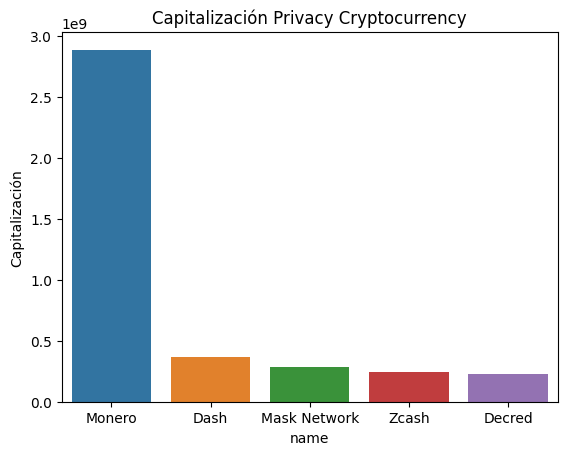

In [31]:
sns.barplot(x = 'name', y = 'market_cap', data = privacy_df)
plt.title("Capitalización Privacy Cryptocurrency")
plt.ylabel("Capitalización")
plt.show()

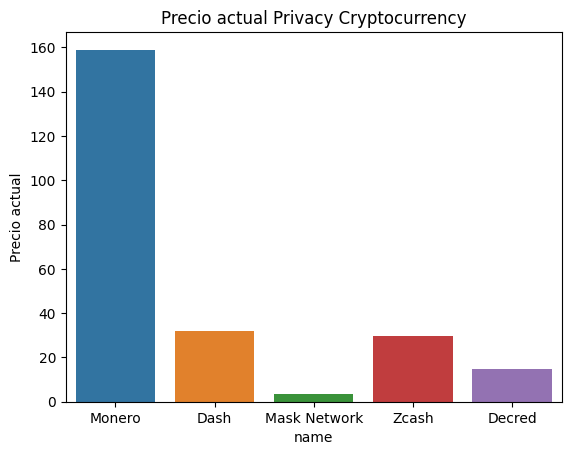

In [32]:
sns.barplot(x = 'name', y = 'current_price', data = privacy_df)
plt.title("Precio actual Privacy Cryptocurrency")
plt.ylabel("Precio actual")
plt.show()

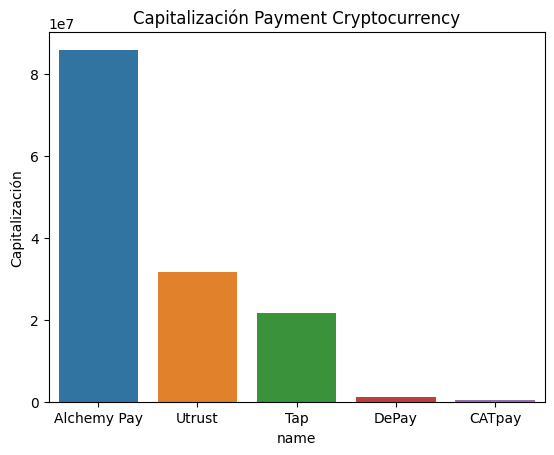

In [33]:
sns.barplot(x = 'name', y = 'market_cap', data = payment_df)
plt.title("Capitalización Payment Cryptocurrency")
plt.ylabel("Capitalización")
plt.show()

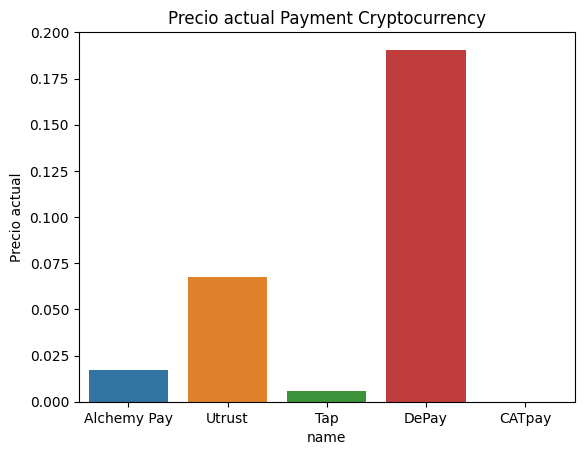

In [34]:
sns.barplot(x = 'name', y = 'current_price', data = payment_df)
plt.title("Precio actual Payment Cryptocurrency")
plt.ylabel("Precio actual")
plt.show()